In [2]:
# Import packages for use in notebook

import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy.interpolate import griddata
from scipy.interpolate import Rbf
import warnings
from matplotlib_scalebar.scalebar import ScaleBar
import matplotlib.font_manager as fm
warnings.filterwarnings("ignore")


%matplotlib inline

In [9]:
os.chdir("/Users/euan-soutter/Desktop/Python/Field_Data/Azerbaijan/Data/") # Sets working directory
df = pd.read_csv("az_reg_thickness.csv") # Loads data from working directory and assigns name 'df'

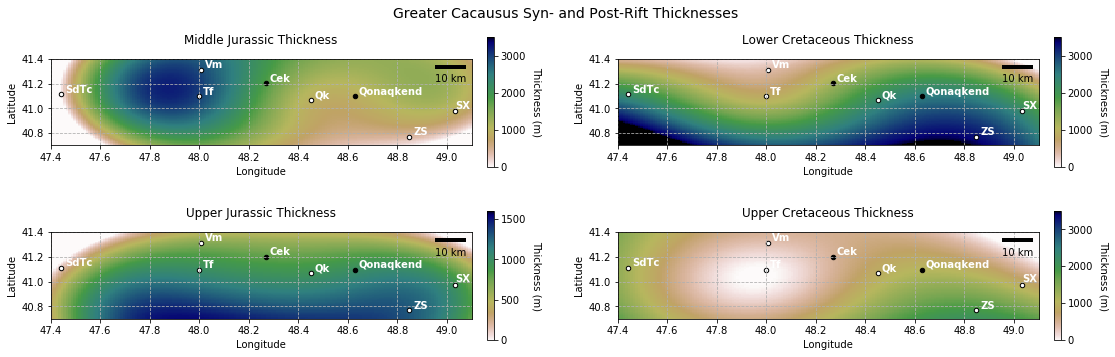

In [10]:
extent = df.long.min(), df.long.max(), df.lat.min(), df.lat.max() # Calls X and Y from loaded data for grid extent
extent = [47.4, 49.1, 40.7, 41.4] # Sets x and y limits of grid (rounded)
grid_long, grid_lat = np.mgrid[47.4:49.1:0.01, 40.7:41.4:0.01] # Makes mesh grid of X and Y and assigns grid to grid_X and grid_Y                     

# Sets up label position parameters 

lat = [41.09592, 40.769308, 40.985, 41.068055,41.31250, 41.113060  ,41.202456,41.097371,]
long = [47.997800, 48.848055, 49.02, 48.451428, 48.007733, 47.442640 ,48.268676,48.628447]
lat = [x+0.015 for x in lat]
long = [x+0.015 for x in long]
n = ['Tf', 'ZS', 'SX', 'Qk','Vm', 'SdTc','Cek','Qonaqkend']

fig, axs = plt.subplots(ncols=2,nrows=2, figsize=(16, 5)) # Plots figure and subplots within figure
cmap = 'gist_earth_r' # Sets color bar
#cmap=plt.cm.get_cmap('RdBu', 10)
function = 'cubic' # Sets interpolation method

# Plots first map

ax = axs[0,0] # Assigns axis to position within figure
rbf = Rbf(df.long, df.lat, df.j2, function=function) # Interpolates scattered data
di = rbf(grid_long, grid_lat) # Assingns interpolated values to 'di'
cax = ax.imshow(di.T, origin="lower", extent=extent, 
                cmap=cmap, aspect='auto',vmin=0,vmax=3500) # Plots interpolation
ax.scatter(df.long, df.lat, s=20, c='w',edgecolors='k')  # Plots scatter of sample points
ax.scatter(df1.long,df1.lat,s=20,c='k')  # Plots scatter of sample points
ax.set_title('Middle Jurassic Thickness', pad=15)  # Sets title of subplot
ax.set_ylabel('Latitude') # Sets y label of subplot
ax.set_xlabel('Longitude') # Sets x label of subplot
ax.ticklabel_format(useOffset=False, style='plain')
ax.grid(which='major', linestyle='dashed')
cbar = fig.colorbar(cax, ax=axs[0,0], orientation='vertical',shrink=0.8,
                    pad=0.03) # Plots color bar
cbar.ax.set_ylabel('Thickness (m)', rotation=270,labelpad = 15) # Plots labels and design of colorbar
scalebar = ScaleBar(80, units='km', location='upper right', length_fraction=0.1,
                    height_fraction=0.05, frameon=False, color='k', pad=0.5) # 1 pixel = 0.2 meter

# Adds labels to points
ax.add_artist(scalebar)
ax.set_aspect(0.5)
for i, txt in enumerate(n):
    ax.annotate(txt, (long[i], lat[i]),color='w',fontweight='bold')

# Plots second map

ax = axs[1,0]
rbf1 = Rbf(df.long, df.lat, df.j3, function=function)
di = rbf1(grid_long, grid_lat)
cax1 = ax.imshow(di.T, origin="lower", extent=extent, 
                 cmap=cmap, aspect='auto',vmin=0,vmax=1600)
ax.scatter(df.long, df.lat, s=20, c='w',edgecolors='k')
ax.scatter(df1.long,df1.lat,s=20,c='k')
ax.set_title('Upper Jurassic Thickness', pad=15)
ax.set_ylabel('Latitude')
ax.set_xlabel('Longitude')
ax.ticklabel_format(useOffset=False, style='plain')
ax.grid(which='major', linestyle='dashed')
cbar = fig.colorbar(cax1, ax=axs[1,0], orientation='vertical',shrink=0.8,pad=0.03)
cbar.ax.set_ylabel('Thickness (m)', rotation=270,labelpad = 15)
scalebar = ScaleBar(80, units='km', location='upper right',length_fraction=0.1,
                    height_fraction=0.05, frameon=False, color='k', pad=0.5) # 1 pixel = 0.2 meter
ax.add_artist(scalebar)
ax.set_aspect(0.5)
for i, txt in enumerate(n):
    ax.annotate(txt, (long[i], lat[i]),color='w',fontweight='bold')

# Plots third map

ax = axs[0,1]
rbf2 = Rbf(df.long, df.lat, df.k1, function=function)
di = rbf2(grid_long, grid_lat)
cax2 = ax.imshow(di.T, origin="lower", extent=extent, 
                 cmap=cmap, aspect='auto',vmin=0,vmax=3500)
ax.scatter(df.long, df.lat, s=20, c='w',edgecolors='k')
ax.scatter(df1.long,df1.lat,s=20,c='k')
ax.set_title('Lower Cretaceous Thickness', pad=15)
ax.set_ylabel('Latitude')
ax.set_xlabel('Longitude')
ax.ticklabel_format(useOffset=False, style='plain')
ax.grid(which='major', linestyle='dashed')
cbar = fig.colorbar(cax2, ax=axs[0,1], orientation='vertical',shrink=0.8,pad=0.03) 
cbar.ax.set_ylabel('Thickness (m)', rotation=270, labelpad=15)
scalebar = ScaleBar(80, units='km', location='upper right',length_fraction=0.1,
                    height_fraction=0.05, frameon=False, color='k', pad=0.5)
ax.add_artist(scalebar)
ax.set_aspect(0.5)
for i, txt in enumerate(n):
    ax.annotate(txt, (long[i], lat[i]),color='w',fontweight='bold')
    
# Plots fourth map

ax = axs[1,1]
rbf3 = Rbf(df.long, df.lat, df.k2, function=function)
di = rbf3(grid_long, grid_lat)
cax3 = ax.imshow(di.T, origin="lower", extent=extent, cmap=cmap, aspect='auto',vmin=0,vmax=3500)
ax.scatter(df.long, df.lat, s=20, c='w',edgecolors='k')
ax.scatter(df1.long,df1.lat,s=20,c='k')
ax.set_title('Upper Cretaceous Thickness', pad=15)
ax.set_ylabel('Latitude')
ax.set_xlabel('Longitude')
ax.ticklabel_format(useOffset=False, style='plain')
ax.grid(which='major', linestyle='dashed')
cbar = fig.colorbar(cax3, ax=axs[1,1], orientation='vertical',shrink=0.8,pad=0.03)
cbar.ax.set_ylabel('Thickness (m)', rotation=270,labelpad = 15)
scalebar = ScaleBar(80, units='km', location='upper right',length_fraction=0.1,
                    height_fraction=0.05, frameon=False, color='k', pad=0.5)
ax.add_artist(scalebar)
ax.set_aspect(0.5)
for i, txt in enumerate(n):
    ax.annotate(txt, (long[i], lat[i]),color='w',fontweight='bold')

fig.suptitle('Greater Cacausus Syn- and Post-Rift Thicknesses', y=1.01,fontsize=14)
plt.tight_layout(w_pad=1.2)